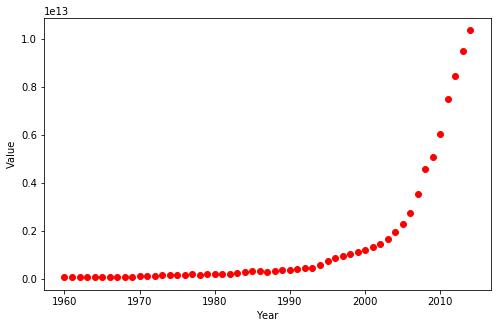

 beta_1 = 690.447527, beta_2 = 0.997207
[[ 1.52263822e+03 -2.88128654e-04]
 [-2.88128654e-04  7.25977514e-09]]


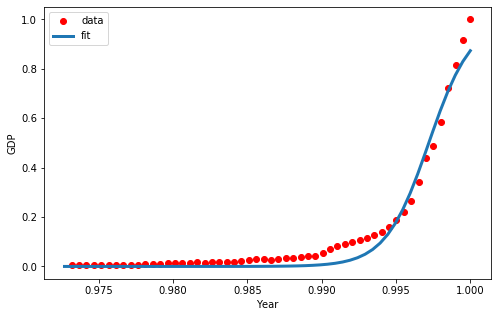

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.96


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv('china_gdp.csv')
df.head(10)

plt.figure(figsize=(8,5))
x_df, y_df = (df['Year'].values,df['Value'].values)
plt.plot(x_df,y_df,'ro')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


def sigmoid(x,beta_1,beta_2):
    y = 1/(1+np.exp(-beta_1*(x-beta_2)))
    return y

x_df = x_df/max(x_df)
y_df = y_df/max(y_df)


from scipy.optimize import curve_fit
popt,pocurve = curve_fit(sigmoid,x_df,y_df)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
print(pocurve)

x=np.linspace(1960,2015,55)
x=x/max(x)
y = sigmoid(x, *popt)
plt.figure(figsize = (8,5))
plt.plot(x_df,y_df,'ro',label='data')
plt.plot(x,y,linewidth=3.0,label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show();



msk = np.random.rand(len(df)) < 0.8
trainx = x_df[msk]
testx = x_df[~msk]
trainy = y_df[msk]
test_y = y_df[~msk]

popt, pcov = curve_fit(sigmoid,trainx,trainy)
y_hat = sigmoid(testx,*popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )